# Deep Learning
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_DL_CODE2024/blob/main/dl01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Excercise 1: Perceptron
- define _step function_ that takes value (z) and returns
Heaviside step function\
$
Heaviside(z) =
\begin{cases}
0\ \text{if}\ z<0\\
1\ \text{if}\ z \ge 0
\end{cases}
$
- define _Perceptron_ function that takes:
    - data: numpy array of shape (m,n)
    - labels: numpy array of shape (m,1)
    - lr: learning rate ($\eta$)
    - e: number of epochs
- add bias term (column with values equal to 1)
- initialize weights with zeros
- loop through epochs
    - loop through instances
        - compute output($\hat{y}$) as $Heaviside(z)$, where $z = x^T w$\
        NOTE: rows of X contain transposed data so use np.dot(x[i], w)
        - calculate new weights $w_{i,j}^{(next\,step)} = w_{i,j}+\eta(y_j-\hat y_j)x_i$
- return trained weights
- draw decision boundary
        



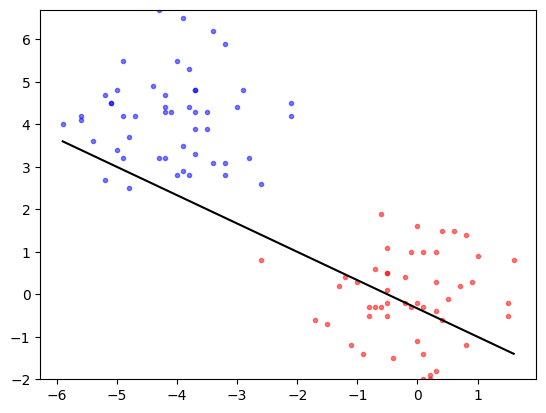

In [1]:
import matplotlib.pyplot as plt
import numpy as np
class_size = 50
np.random.seed(42)
# Generate data points
X1 = np.random.normal(0,1,(class_size,2)).round(1)
X2 = np.random.normal(0,1,(class_size,2)).round(1)+np.random.randint(-5,5, (1,2))
X_train = np.concatenate((X1, X2))

# Generate labels
y_train = np.concatenate((np.zeros(class_size),np.ones(class_size)))

#Shuffle data
p = np.random.permutation(len(X_train))
X_train, y_train = X_train[p], y_train[p]

#plot data points
def plot_data(X,y):
    # plt.scatter(X[:,0],X[:,1],c=y, alpha=0.6)
    plt.plot(X[:,0][y==0],X[:,1][y==0], 'r.',alpha=0.5)
    plt.plot(X[:,0][y==1],X[:,1][y==1], 'b.',alpha=0.5)

# plot (dummy) decision boundary
def plot_decision_boundary(X,w, a=1):
    x1 = np.linspace(min(X[:,0]),max(X[:,0]),10)
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1+c
    plt.plot(x1,x2, c='k', alpha=a)
    plt.ylim(min(X[:,1]),max(X[:,1]))

# Dummy weights
w_dummy = [1,2,3]

plot_data(X_train,y_train)
plot_decision_boundary(X_train, w_dummy)


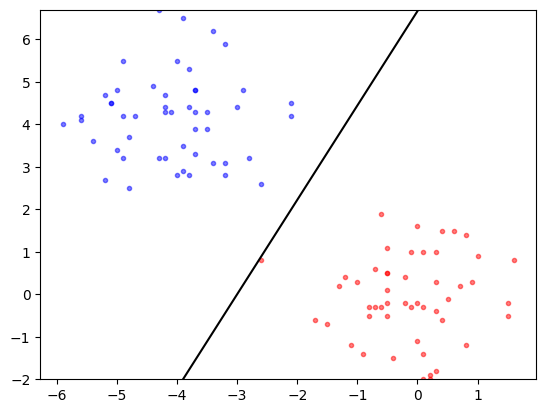

In [8]:
def step_function(z):
    if z >= 0:
        return 1
    else:
        return 0

def perceptron(data, labels, lr, e):
    """
    data: numpy array of shape (m,n)
    labels: numpy array of shape (m,1)
    lr: learning rate
    e: number of epochs
    """
    data = np.concatenate((np.ones((data.shape[0],1)), data), axis=1)
    w = np.zeros(data.shape[1])
    for _ in range(e):
        for i in range(data.shape[0]):
            z = np.dot(data[i], w)
            y_hat = step_function(z)
            w += lr * (labels[i] - y_hat) * data[i]
    return w

    # your code here
w = perceptron(X_train, y_train, 0.1, 10)
plot_data(X_train,y_train)
plot_decision_boundary(X_train, w)